- yolov8 github: https://github.com/ultralytics/ultralytics
- yolov8 docs: https://docs.ultralytics.com/quickstart/

In [ ]:

# Pip install (recommended)

!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 618.4/618.4 kB 8.4 MB/s eta 0:00:00


# Creating train-val split

In [ ]:
## importing required libraries
import os
import shutil
import random

!pip install tqdm --upgrade
from tqdm.notebook import tqdm

from google.colab import drive
drive.mount('/content/drive')

split = 0.4
xepoch = 30
xbatch = 16

In [ ]:
train_path_img = "./yolo_data/images/train/"
train_path_label = "./yolo_data/labels/train/"
val_path_img = "./yolo_data/images/val/"
val_path_label = "./yolo_data/labels/val/"
test_path = "./yolo_data/test"

def train_test_split(path,neg_path=None, split):
    print("------ PROCESS STARTED -------")


    files = list(set([name[:-4] for name in os.listdir(path)])) ## removing duplicate names i.e. counting only number of images


    print (f"--- This folder has a total number of {len(files)} images---")
    random.seed(42)
    random.shuffle(files)

    test_size = int(len(files) * split)
    train_size = len(files) - test_size

    ## creating required directories

    os.makedirs(train_path_img, exist_ok = True)
    os.makedirs(train_path_label, exist_ok = True)
    os.makedirs(val_path_img, exist_ok = True)
    os.makedirs(val_path_label, exist_ok = True)


    ### ----------- copying images to train folder
    for filex in tqdm(files[:train_size]):
      if filex == 'classes':
          continue
      shutil.copy2(path + filex + '.jpg',f"{train_path_img}/" + filex + '.jpg' )
      shutil.copy2(path + filex + '.txt', f"{train_path_label}/" + filex + '.txt')



    print(f"------ Training data created with 80% split {len(files[:train_size])} images -------")

    if neg_path:
        neg_images = list(set([name[:-4] for name in os.listdir(neg_path)])) ## removing duplicate names i.e. counting only number of images
        for filex in tqdm(neg_images):
            shutil.copy2(neg_path+filex+ ".jpg", f"{train_path_img}/" + filex + '.jpg')

        print(f"------ Total  {len(neg_images)} negative images added to the training data -------")

        print(f"------ TOTAL Training data created with {len(files[:train_size]) + len(neg_images)} images -------")



    ### copytin images to validation folder
    for filex in tqdm(files[train_size:]):
      if filex == 'classes':
          continue
      # print("running")
      shutil.copy2(path + filex + '.jpg', f"{val_path_img}/" + filex + '.jpg' )
      shutil.copy2(path + filex + '.txt', f"{val_path_label}/" + filex + '.txt')

    print(f"------ Testing data created with a total of {len(files[train_size:])} images ----------")

    print("------ TASK COMPLETED -------")

## spliting the data into train-test and creating train.txt and test.txt files
# train_test_split('/content/drive/MyDrive/custom_notebooks/yolo_data/')

### for label_tag
train_test_split('/content/drive/MyDrive/yolov8/data/',split) ### without negative images
# train_test_split('./data/','./negative_images/') ### if you want to feed negative images

------ PROCESS STARTED -------
--- This folder has a total number of 152 images---


  0%|          | 0/92 [00:00<?, ?it/s]

------ Training data created with 80% split 92 images -------


  0%|          | 0/60 [00:00<?, ?it/s]

------ Testing data created with a total of 60 images ----------
------ TASK COMPLETED -------


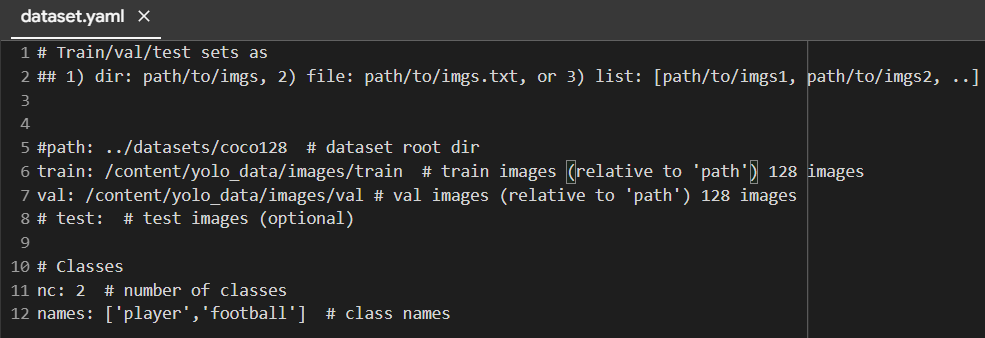

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.186 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/107.7 GB disk)


# Command Line Interface:


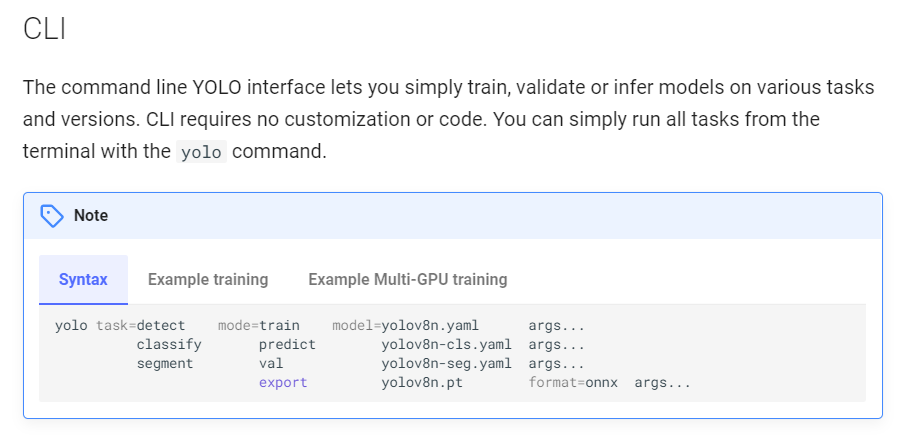

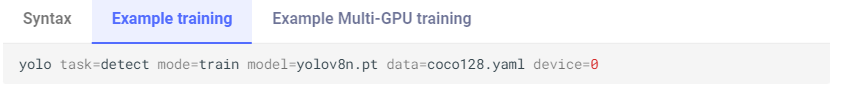

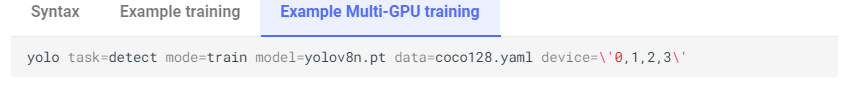

## Training

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/yolov8/dataset.yaml epochs = xepoch imgsz = 640 batch= xbatch project=/content/drive/MyDrive/yolov8/training_results name=robots

Ultralytics YOLOv8.0.186 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/yolov8/dataset.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/yolov8/training_results, name=robots, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=

## Inferencing

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/yolov8/training_results/robots2/weights/best.pt conf=0.55 source=/content/drive/MyDrive/yolov8/test_images

Ultralytics YOLOv8.0.185 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients

image 1/4 /content/drive/MyDrive/yolov8/test_images/Screen Shot 2023-09-24 at 10.39.41.png: 288x640 1 BLU, 1 RED, 102.5ms
image 2/4 /content/drive/MyDrive/yolov8/test_images/Screen Shot 2023-09-24 at 10.39.54.png: 256x640 1 BLU, 2 REDs, 63.6ms
image 3/4 /content/drive/MyDrive/yolov8/test_images/Screen Shot 2023-09-24 at 10.40.05.png: 288x640 2 BLUs, 3 REDs, 11.5ms
image 4/4 /content/drive/MyDrive/yolov8/test_images/Screen Shot 2023-09-24 at 12.22.40.png: 288x640 3 BLUs, 3 REDs, 10.6ms
Speed: 1.7ms preprocess, 47.1ms inference, 22.9ms postprocess per image at shape (1, 3, 288, 640)
Results saved to runs/detect/predict9
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!cp -r /content/runs/detect/predict /content/drive/MyDrive/yolov8/output

### inferencing on video


In [ ]:
#no test yet
!yolo task=detect mode=predict model=/content/drive/MyDrive/yolov8/training_results/robots/weights/best.pt conf=0.77 source=/content/drive/MyDrive/yolov8/test_videos

Streaming output truncated to the last 5000 lines.
video 1/1 (699/5695) /content/drive/MyDrive/yolov8/test_videos/Einstein Final 2 - 2023 FIRST Championship.mp4: 384x640 1 RED, 11.0ms
video 1/1 (700/5695) /content/drive/MyDrive/yolov8/test_videos/Einstein Final 2 - 2023 FIRST Championship.mp4: 384x640 1 RED, 11.0ms
video 1/1 (701/5695) /content/drive/MyDrive/yolov8/test_videos/Einstein Final 2 - 2023 FIRST Championship.mp4: 384x640 1 RED, 11.0ms
video 1/1 (702/5695) /content/drive/MyDrive/yolov8/test_videos/Einstein Final 2 - 2023 FIRST Championship.mp4: 384x640 1 RED, 11.0ms
video 1/1 (703/5695) /content/drive/MyDrive/yolov8/test_videos/Einstein Final 2 - 2023 FIRST Championship.mp4: 384x640 1 RED, 11.1ms
video 1/1 (704/5695) /content/drive/MyDrive/yolov8/test_videos/Einstein Final 2 - 2023 FIRST Championship.mp4: 384x640 1 RED, 11.0ms
video 1/1 (705/5695) /content/drive/MyDrive/yolov8/test_videos/Einstein Final 2 - 2023 FIRST Championship.mp4: 384x640 1 RED, 11.0ms
video 1/1 (706/569

In [ ]:
!cp -r /content/runs/detect/predict2 /content/drive/MyDrive/yolov8/output

## Export the model -- In progress

Export a YOLOv8 model to any supported format with the `format` argument, i.e. `format=onnx`.

Format                  | `format=...**bold text**`         | Model
---                     | ---                       | ---
PyTorch                 | -                         | yolov8n.pt
TorchScript             | `torchscript`             | yolov8n.torchscript
ONNX                    | `onnx`                    | yolov8n.onnx
OpenVINO                | `openvino`                | yolov8n_openvino_model/
TensorRT                | `engine`                  | yolov8n.engine
CoreML                  | `coreml`                  | yolov8n.mlmodel
TensorFlow SavedModel   | `saved_model`             | yolov8n_saved_model/
TensorFlow GraphDef     | `pb`                      | yolov8n.pb
TensorFlow Lite         | `tflite`                  | yolov8n.tflite
TensorFlow Edge TPU     | `edgetpu`                 | yolov8n_edgetpu.tflite
TensorFlow.js           | `tfjs`                    | yolov8n_web_model/
PaddlePaddle            | `paddle`                  | yolov8n_paddle_model/

In [ ]:
!yolo mode=export model=/content/drive/MyDrive/yolov8/training_results/robots/weights/best.pt format=onnx

{'task': 'detect', 'mode': 'export', 'model': '/content/drive/MyDrive/yolov8/training_results/football2/weights/best.pt', 'data': None, 'epochs': 100, 'patience': 50, 'batch': 16, 'imgsz': 640, 'save': True, 'cache': False, 'device': None, 'workers': 8, 'project': None, 'name': None, 'exist_ok': False, 'pretrained': False, 'optimizer': 'SGD', 'verbose': False, 'seed': 0, 'deterministic': True, 'single_cls': False, 'image_weights': False, 'rect': False, 'cos_lr': False, 'close_mosaic': 10, 'resume': False, 'overlap_mask': True, 'mask_ratio': 4, 'dropout': 0.0, 'val': True, 'save_json': False, 'save_hybrid': False, 'conf': None, 'iou': 0.7, 'max_det': 300, 'half': False, 'dnn': False, 'plots': True, 'source': None, 'show': False, 'save_txt': False, 'save_conf': False, 'save_crop': False, 'hide_labels': False, 'hide_conf': False, 'vid_stride': 1, 'line_thickness': 3, 'visualize': False, 'augment': False, 'agnostic_nms': False, 'retina_masks': False, 'format': 'onnx', 'keras': False, 'opti